Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

Data Dictionary

S.No.: Serial number
Name: Name of the car which includes brand name and model name
Location: Location in which the car is being sold or is available for purchase
Year: Manufacturing year of the car
Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
Transmission: The type of transmission used by the car (Automatic/Manual)
Owner: Type of ownership
Mileage: The standard mileage offered by the car company in kmpl or km/kg
Engine: The displacement volume of the engine in CC
Power: The maximum power of the engine in bhp
Seats: The number of seats in the car
New_Price: The price of a new car of the same model in dollars
Price: The price of the used car in dollars

Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

In [1]:
#Importing the libraries for data manipulation and visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from typing import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score,precision_score, recall_score, f1_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from imblearn.over_sampling import SMOTE
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('used_cars_data-1.csv')

In [3]:
#To check few rows in the dataset

df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [4]:
#To check the details of the our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [5]:
#To check for the missing columns inside the dataset

df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [6]:
#To show the statistical analysis of the dataset

df.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


## Data Cleaning 

### Name cleaning

In [7]:
df['Name'].unique

<bound method Series.unique of 0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7253, dtype: object>

In [8]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

In [9]:
#Extracing only the first name in the Name column

df['New_Name'] = df['Name'].str.split(' ').str[0]  # Extract brand name

In [10]:
df['New_Name'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: New_Name, dtype: int64

In [11]:
# set threshold to 300
threshold = 300

# get the value count of platforms
Brand = df["New_Name"].value_counts()


# filter the platforms to only those with at least 300 occurrence
new_brand_list = Brand[Brand.values >= threshold].index.tolist()

In [12]:
print(new_brand_list)

['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Mercedes-Benz', 'Volkswagen', 'Ford', 'Mahindra', 'BMW']


In [13]:
# to replace the remaing with others 
brand_val = []

# Iterate over each row in the dataframe
for i in range(df.shape[0]):

   #  getting the values in plat from  column
    txt = df.New_Name.values[i] 
    
     # Initialize flag variable to 0
    flag = 0  

    # Iterate over the new_platforms list
    for item in new_brand_list:  
        # If the item is in the current row and flag is 0, append the item to platform_vals
        if item in txt and flag == 0:  
            brand_val.append(item)
            flag = 1

    # If the flag is 0, the row value is not in the new platforms list. Append "Others" to platform_vals
    if flag == 0:  
        brand_val.append("Others")

In [14]:
# creating a new column from exiting colum

df["Car_Name"] = brand_val

In [15]:
df["Car_Name"].value_counts()

Others           1471
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Name: Car_Name, dtype: int64

In [16]:
 # Drop the 'Brand_Name' column
    
df = df.drop('Name', axis=1)

### Location Cleaning

In [17]:
df[df['Location'] == (" ")]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,New_Name,Car_Name


### Year Cleaning

In [18]:
df[df['Year'] == (" ")]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,New_Name,Car_Name


### Kilometers driven Cleaning

In [19]:
df[df['Kilometers_Driven'] == (" ")]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,New_Name,Car_Name


### Fuel_Type Cleaning

In [20]:
df[df['Fuel_Type'] == (" ")]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,New_Name,Car_Name


### Transmission Cleaning

In [21]:
df[df['Transmission'] == (" ")]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,New_Name,Car_Name


### Owner_Type cleaning

In [22]:
df[df['Owner_Type'] == (" ")]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,New_Name,Car_Name


### Mileage Cleaning

In [23]:
df[df['Mileage'] == (" ")]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,New_Name,Car_Name


In [24]:
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

looking through the report the mileage column it cintains 2 uints kmpl and km/kg

In [25]:
# to know the number of km/kg and kmpl the mileage columns
kmkg = 0
kmpl = 0
for i in df.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Kmpl : {} '.format(kmpl))

The number of rows with Km/Kg : 74 
The number of rows with Kmpl : 7177 


In [26]:
# 1 liter of mileage = 710 to 775 grams ~= 742.5

New_Mileage= []
for i in df.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-5]
        i = float(i)*1.40
        New_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-5]
        #print(i)
        New_Mileage.append(float(i))

In [27]:
New_mileage_series = pd.Series(New_Mileage)

In [28]:
New_Mileage = pd.DataFrame(New_Mileage)
New_Mileage = New_Mileage.reindex(df.index)

In [29]:
New_Mileage

,0
0,37.24
1,19.67
2,18.20
3,20.77
4,15.20
...,...
7248,23.08
7249,17.20
7250,10.00
7251,NaN


In [30]:
#To create a new coloumn call new mileage

df["New_Mileage"] = New_Mileage

In [31]:
#So the Mileage will be drop

df = df.drop('Mileage', axis=1)

In [32]:
#To treate the missing value

df[7250:7252]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,New_Name,Car_Name,New_Mileage
7250,7250,Kolkata,2012,28000,Diesel,Manual,First,1461 CC,63.1 bhp,5.0,9.47,NaN,Nissan,Others,10.0
7251,7251,Pune,2013,52262,Petrol,Automatic,Third,1197 CC,103.6 bhp,5.0,10.15,NaN,Volkswagen,Volkswagen,NaN


In [33]:
#Note that the NaN value will be drop in the data

df = df.dropna(subset=['New_Mileage'])

### Engine Cleaning

In [34]:
df['Engine'].isnull().sum()

46

In [35]:
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [36]:
# Missing value treatment for Engine using the mode

df['Engine'].mode()

0    1197 CC
dtype: object

In [37]:
mode_engine = df['Engine'].mode()[0]

df['Engine'] = df['Engine'].fillna(mode_engine)

In [38]:
#checking the mising value

df['Engine'].isnull().sum()

0

### Power Cleaning

In [39]:
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp', nan,
       '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp', '218 bhp',
       '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp', '82.85 bhp',
       '67 bhp', '241.4 bhp', '35 bhp',

In [40]:
# Missing value treatment for Engine using the mode

df['Power'].mode()

0    74 bhp
dtype: object

In [41]:
mode_power = df['Power'].mode()[0]

df['Power'] = df['Power'].fillna(mode_power)

In [42]:
#checking the mising value

df['Power'].isnull().sum()

0

### Seats Cleaning

In [43]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [44]:
# Missing value treatment for Seats using the mode

df['Seats'].mode()

0    5.0
dtype: float64

In [45]:
mode_seats = df['Seats'].mode()[0]

df['Seats'] = df['Seats'].fillna(mode_seats)

In [46]:
#checking the mising value

df['Seats'].isnull().sum()

0

### Price Cleaning 

In [47]:
df['Price'].unique()

array([ 1.75, 12.5 ,  4.5 , ..., 17.56,  7.43,   nan])

In [48]:
# Missing value treatment for Seats using the midian

df['Price'].median()

5.64

In [49]:
median_price = df['Price'].median()

df['Price'] = df['Price'].fillna(median_price)

In [50]:
df.isnull().sum()

S.No.                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
New_Name             0
Car_Name             0
New_Mileage          0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7250
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7251 non-null   int64  
 1   Location           7251 non-null   object 
 2   Year               7251 non-null   int64  
 3   Kilometers_Driven  7251 non-null   int64  
 4   Fuel_Type          7251 non-null   object 
 5   Transmission       7251 non-null   object 
 6   Owner_Type         7251 non-null   object 
 7   Engine             7251 non-null   object 
 8   Power              7251 non-null   object 
 9   Seats              7251 non-null   float64
 10  New_Price          7251 non-null   float64
 11  Price              7251 non-null   float64
 12  New_Name           7251 non-null   object 
 13  Car_Name           7251 non-null   object 
 14  New_Mileage        7251 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 906.4+ KB


## Data Visualization

In [53]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

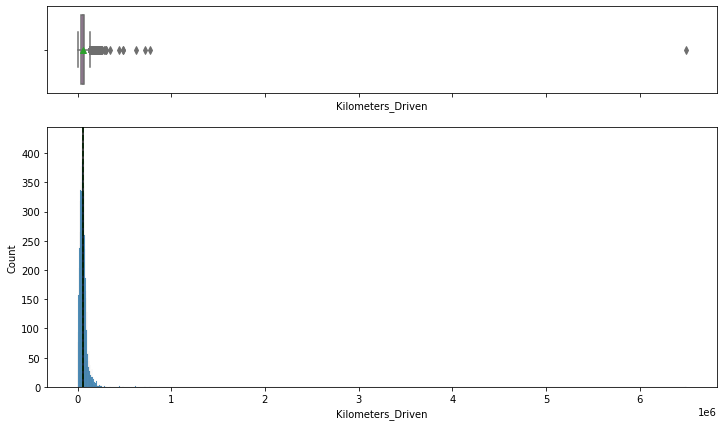

In [54]:
histogram_boxplot(data = df, feature = 'Kilometers_Driven')

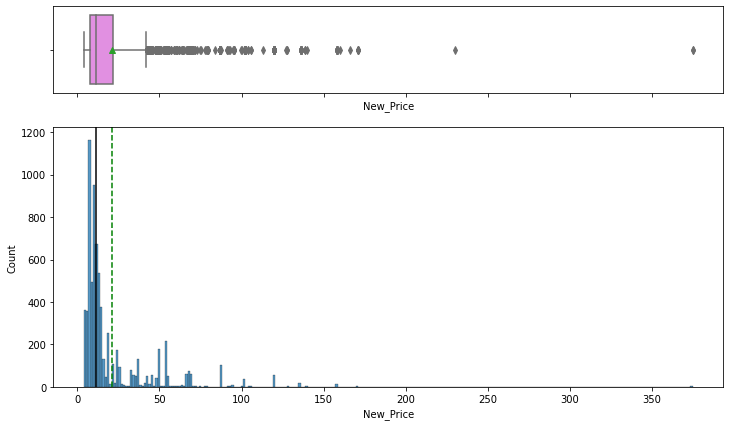

In [55]:
histogram_boxplot(data = df, feature = 'New_Price')

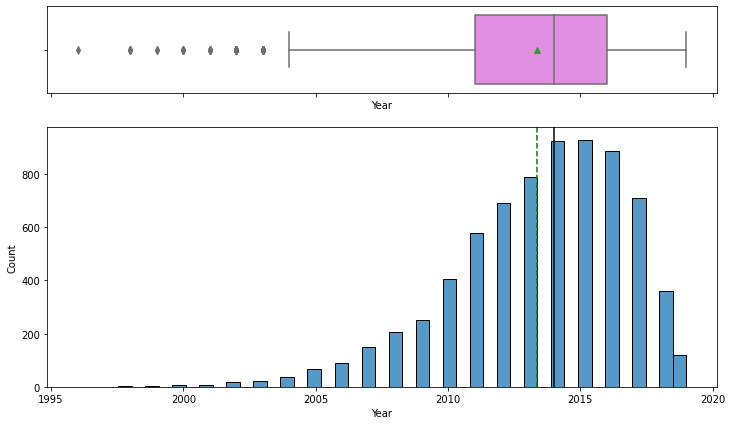

In [56]:
histogram_boxplot(data = df, feature = 'Year')

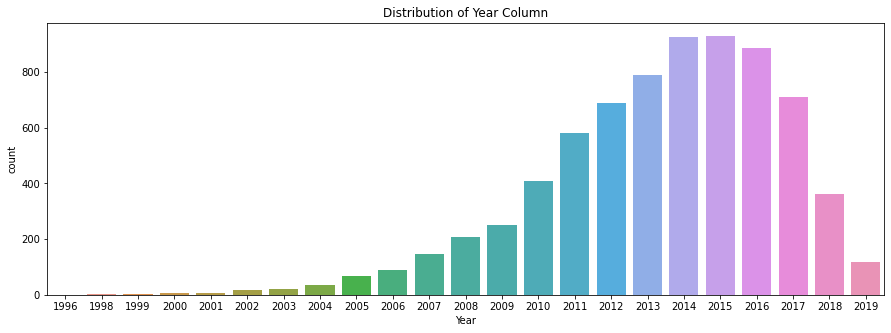

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='Year');
plt.title('Distribution of Year Column');

## Bivaraite Visualization

In [58]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, title = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

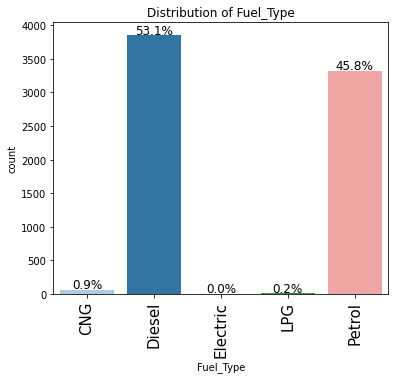

In [59]:
labeled_barplot(data = df, feature = 'Fuel_Type', perc = True, title = 'Distribution of Fuel_Type')

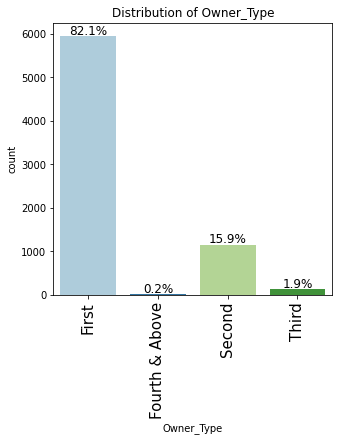

In [60]:
labeled_barplot(data = df, feature = 'Owner_Type', perc = True, title = 'Distribution of Owner_Type')

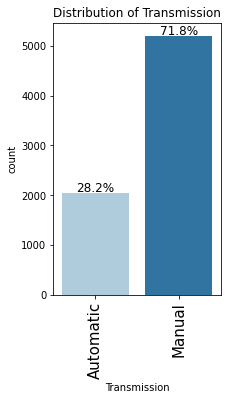

In [61]:
labeled_barplot(data = df, feature = 'Transmission', perc = True, title = 'Distribution of Transmission')

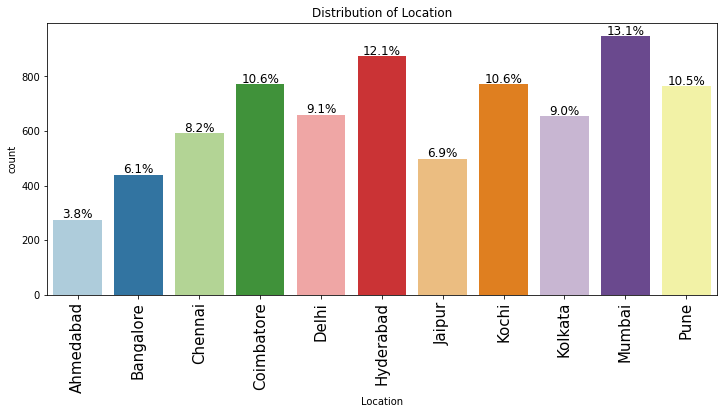

In [62]:
labeled_barplot(data = df, feature = 'Location', perc = True, title = 'Distribution of Location')

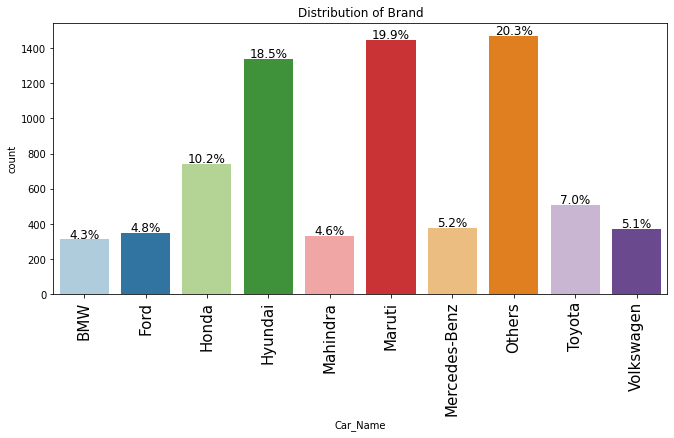

In [63]:
labeled_barplot(data = df, feature = 'Car_Name', perc = True, title = 'Distribution of Brand')

In [64]:
num_data = df.select_dtypes(include = 'number')

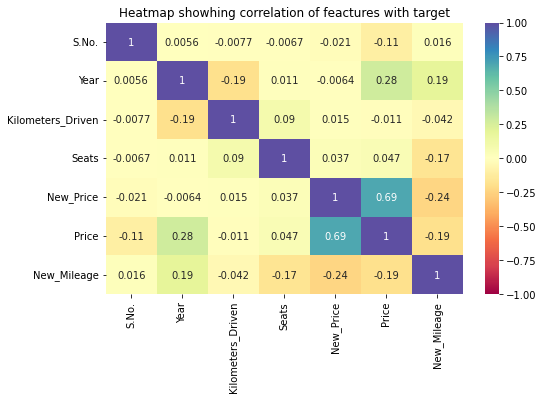

In [65]:
mat_cor = num_data.corr()

plt.figure(figsize = (8, 5))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral')
plt.title('Heatmap showhing correlation of feactures with target');

In [66]:
# Funtion to create scatterplot between two numerical features 
def scatterplot_func(x,y, title,data = df):
    plt.figure(figsize = (6,4))
    sns.scatterplot(x=x,y=y, data = df) # data is a default line so no need to pass it 
    plt.title(title)
    plt.show()

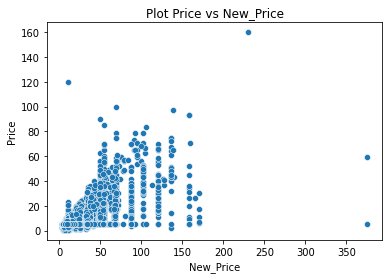

In [67]:
scatterplot_func(x ="New_Price",y="Price", title = "Plot Price vs New_Price")

### For the Outlier detection and treatment

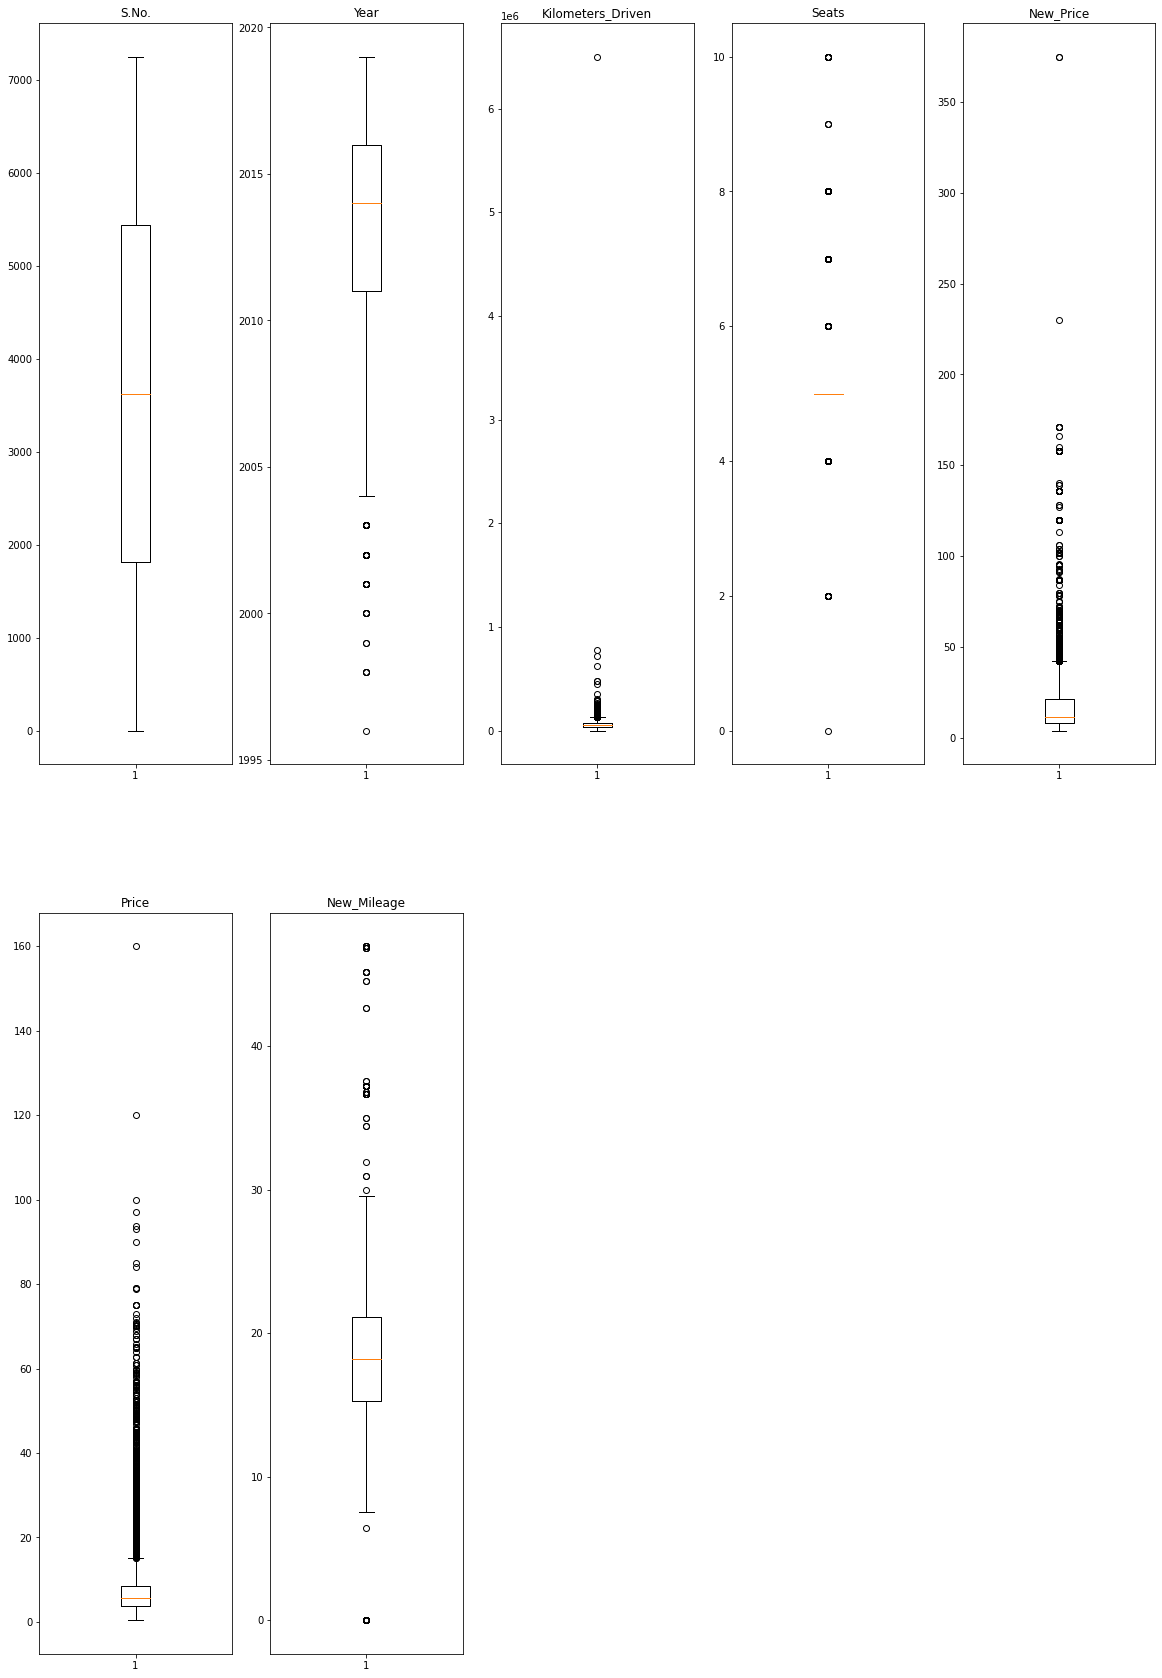

In [68]:
# outlier detection  using boxplot 
# Create a new figure with a size of 20 by 30 inches
plt.figure(figsize=(20, 30))

# Loop through each numerical variable in the dataset
for i, variable in enumerate(num_data):
    
    # Create a subplot in the figure with 2 rows and 5 columns, and set the current plot to the i-th one
    plt.subplot(2, 5, i+1)
    
    # Create a boxplot of the current variable
    plt.boxplot(df[variable])
    
    # Set the title of the current subplot to the name of the current variable
    plt.title(variable)
    
# Display the figure
plt.show()


# The first line of code plt.subplot(2,5, i+1) is creating a grid of 10 subplots arranged in a 2x5 grid, with the subplot index increasing by 1 for each iteration of the for loop
#The second line of code plt.boxplot(df[variable]) is creating a boxplot of the numerical data in the variable variable from the DataFrame df

In [69]:
num_data.drop('Price', axis = 1, inplace = True)

num_data.columns

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'New_Price',
       'New_Mileage'],
      dtype='object')

In [70]:
# how the  clip works 
l1 = [-30,5,0,300]
np.clip(l1,0,5) # for list l1 clip any value below min 0 and max 5 to there nearest end 

array([0, 5, 0, 5])

In [71]:
# This treat individual variable
def otliers_treatment(df,col):
    """
    Treat outliers in variable
    col: str, name of the numerical variable
    df: dataframe
    """
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75) # 75th quantile
    IQR = Q3-Q1 # IQR = inter quantile range 
    lower_whisker = Q1-(1.5*IQR)
    upper_whiskers = Q3+(1.5*IQR)
    df[col]=np.clip(df[col],lower_whisker,upper_whiskers)
    return df

# treat all the numeric variable
# loop true the column and pass to the fubction
def all_outliers_treatment(df,col_list): 
    for c in col_list:
        df = outliers_treatment(df,c)
        return df

In [72]:
# This function treats outliers in a single numerical column of a dataframe
def outliers_treatment(df, col):
    """
    Treat outliers in a numerical column of a dataframe using the interquartile range (IQR) method.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the column to be treated.
    col (str): The name of the column to be treated.

    Returns:
    pandas.DataFrame: The modified dataframe with clipped values for the specified column.
    """
    # Calculate the 25th and 75th quantiles of the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper whiskers for outlier detection
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whiskers = Q3 + (1.5 * IQR)

    # Clip the values in the column to be within the lower and upper whiskers
    df[col] = np.clip(df[col], lower_whisker, upper_whiskers)

    return df


# This function treats outliers in all numerical columns of a dataframe
def all_outliers_treatment(df, col_list):
    """
    Treat outliers in all numerical columns of a dataframe using the interquartile range (IQR) method.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the columns to be treated.
    col_list (list of str): The list of column names to be treated.

    Returns:
    pandas.DataFrame: The modified dataframe with clipped values for all specified columns.
    """
    # Loop through the columns in the col_list and call the outliers_treatment function on each column
    for c in col_list:
        df = outliers_treatment(df, c)

    # Return the modified dataframe
    return df

In [73]:
df = all_outliers_treatment(df,num_data)

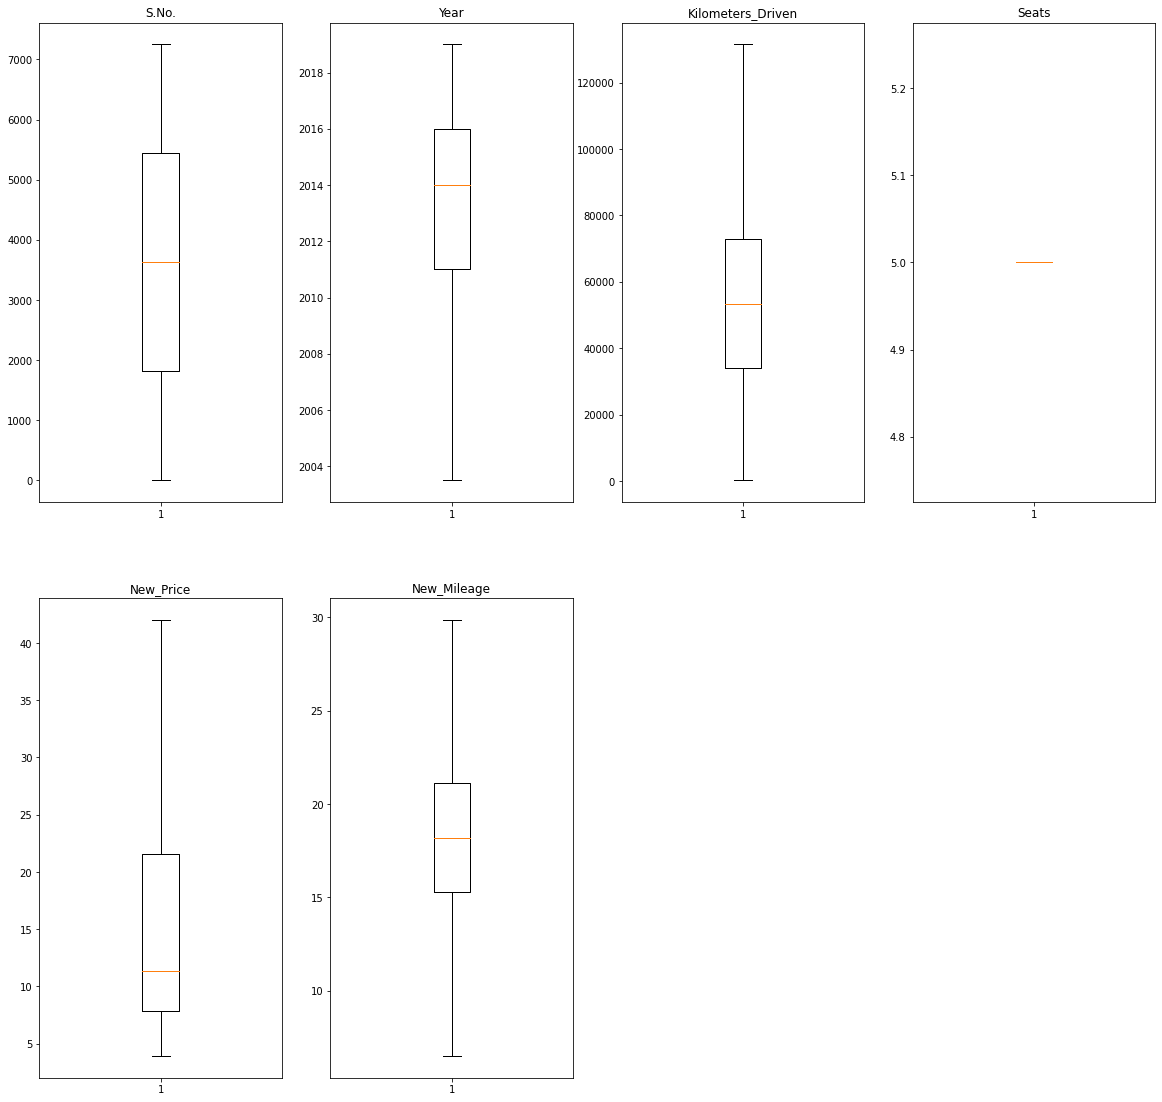

In [74]:
# Create a figure with a size of 20 by 30 inches
plt.figure(figsize=(20, 30))

# Loop through each numerical variable in the dataset
for i, variable in enumerate(num_data):
    
    # Create a subplot in the figure with 3 rows and 4 columns, and set the current plot to the i-th one
    plt.subplot(3, 4, i+1)
    
    # Create a boxplot of the current variable, with whiskers set to 1.5 times the interquartile range (IQR)
    plt.boxplot(df[variable], whis=1.5)
    
    # Set the title of the current subplot to the name of the current variable
    plt.title(variable)
    
# Show the figure
plt.show()

## For Price

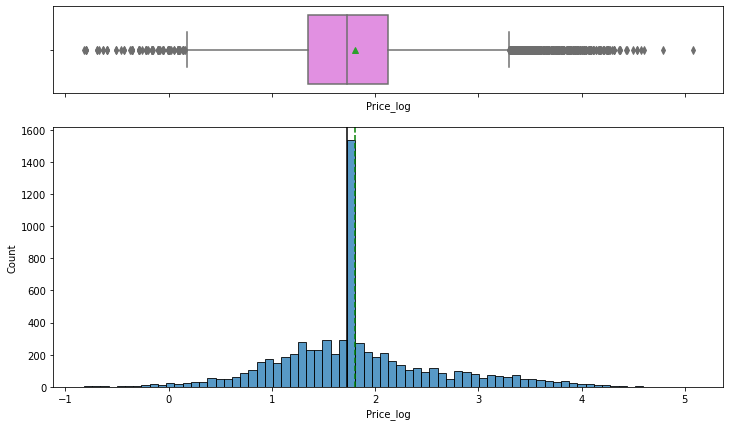

In [75]:
# transfrom the target using log transformation. it make left or write skewwed vairable  approximatly normal 
df["Price_log"] = np.log(df["Price"])

histogram_boxplot(data = df, feature="Price_log")


### Building Model

In [77]:
df.columns

Index(['S.No.', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price', 'New_Name', 'Car_Name', 'New_Mileage', 'Price_log'],
      dtype='object')

In [78]:
# Select features and target
X = df[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine', 'Power', 'Seats', 'New_Price', 'Car_Name', 'New_Mileage']]
y = df["Price_log"] + 1e-10

In [79]:
# convert all categorical features to numerical data: OneHotEncoding
X = pd.get_dummies(X, drop_first = True)

X.head()

,Year,Kilometers_Driven,Seats,New_Price,New_Mileage,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Power_99.6 bhp,Car_Name_Ford,Car_Name_Honda,Car_Name_Hyundai,Car_Name_Mahindra,Car_Name_Maruti,Car_Name_Mercedes-Benz,Car_Name_Others,Car_Name_Toyota,Car_Name_Volkswagen
0,2010.0,72000.0,5.0,5.5100,29.86,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2015.0,41000.0,5.0,16.0600,19.67,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2011.0,46000.0,5.0,8.6100,18.20,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2012.0,87000.0,5.0,11.2700,20.77,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2013.0,40670.0,5.0,42.0175,15.20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
# split the data into training and testing and validation 

x_temp, x_test, y_temp, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp,test_size = 0.2,random_state=0)

In [81]:
# Normalize the data
scaler = StandardScaler() # convert data to have a mean of zero and  SDT 1

#x_train = scaler.fit().transform()# same
x_train_sd = scaler.fit_transform(x_train) # fit calculate the mean & SDT of each of the variable. transform use cal mean and STD to transform our data 
x_test_sd = scaler.transform(x_test)
x_val_sd = scaler.transform(x_val)

In [86]:
#Build linear regression

lin_reg = LinearRegression()

#build the model
lin_reg.fit(x_train_sd, y_train)

LinearRegression()

### The Model Performance Check

In [87]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    mse= mean_squared_error(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "MSE":mse,
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [88]:
lin_reg_training = model_performance_regression(lin_reg,x_train_sd,y_train)

lin_reg_training 

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.113016,0.336179,0.228038,0.822638,0.79804,8.003792e+08


In [89]:
lin_reg_val = model_performance_regression(lin_reg,x_val_sd,y_val)
lin_reg_val

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.628552e+26,2.151407e+13,1.213659e+12,-7.425398e+26,-1.448828e+27,4.080193e+21


In [90]:
lin_reg_testing = model_performance_regression(lin_reg,x_test_sd,y_test)
lin_reg_testing

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.272418e+26,1.507454e+13,1.159860e+12,-3.557377e+26,-5.828471e+26,6.541571e+22


In [91]:
print(lin_reg.coef_)

print(x_train.columns)

[ 2.70505589e-01 -4.09040557e-02 -6.46079482e+12  4.48209599e-01
 -2.03825187e-02  2.14880930e-02  2.95962099e-02  3.54709037e-02
 -2.73035593e-02  3.83758545e-02 -5.85937500e-03 -1.83105469e-04
 -6.12792969e-02 -1.51367188e-02  4.39453125e-03  5.26123047e-02
  3.29895020e-02 -9.21630859e-03 -1.23291016e-02 -3.50036621e-02
  3.41796875e-03 -1.29394531e-02 -2.32543945e-02 -4.31518555e-02
 -9.08813477e-02 -4.47387695e-02 -2.51464844e-02  3.35693359e-04
 -6.62949736e+11 -3.41186523e-02 -3.35458246e+12 -1.50146484e-02
 -1.02996826e-01 -8.50830078e-02 -7.50122070e-02 -1.97601318e-02
 -9.79003906e-02 -2.91061401e-02 -1.41906738e-02 -3.84826660e-02
 -2.07519531e-03 -3.47900391e-02 -1.30920410e-02 -5.34057617e-03
 -7.38525391e-03  7.21232705e+12 -2.65884399e-02 -9.00561576e+12
 -7.28111267e-02 -2.47802734e-02 -2.91976929e-02  7.16407131e+12
 -5.44433594e-02  3.73628495e+11 -4.73302354e+12  1.44803445e+12
 -7.63702393e-02 -4.40673828e-02 -4.17480469e-02 -6.49108887e-02
 -1.14501953e-01 -9.42993